# Page View Time Series Visualizer

This notebook demonstrates the process of visualizing time series data using a line chart, bar chart, and box plots. We will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the ``freeCodeCamp.org`` forum from 2016-05-09 to 2019-12-03. The data visualizations will help us understand the patterns in visits and identify yearly and monthly growth.

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
import numpy as np

# Resolve deprecation warning
np.float = float
register_matplotlib_converters()

1. Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.

In [30]:
df = pd.read_csv("fcc-forum-pageviews.csv",parse_dates=['date'], index_col='date')
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


2. Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.


In [31]:
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

3. Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.


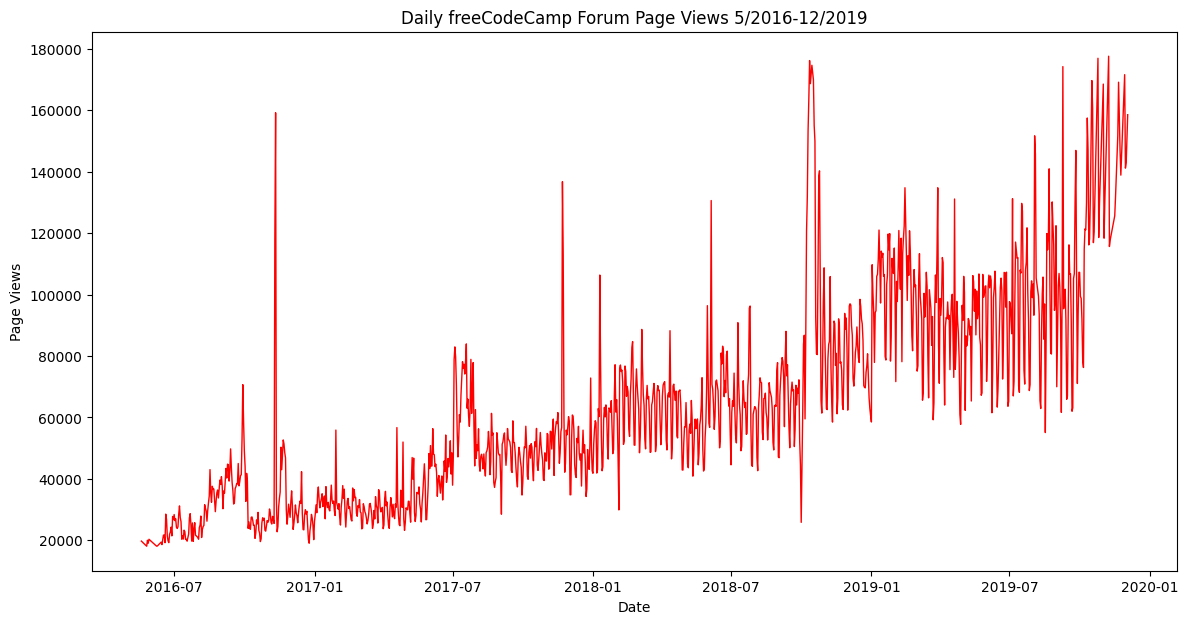

In [34]:
def draw_line_plot():
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.plot(df.index, df['value'], 'r', linewidth=1)
    
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    
    fig.savefig('line_plot.png')

draw_line_plot()

4. Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.


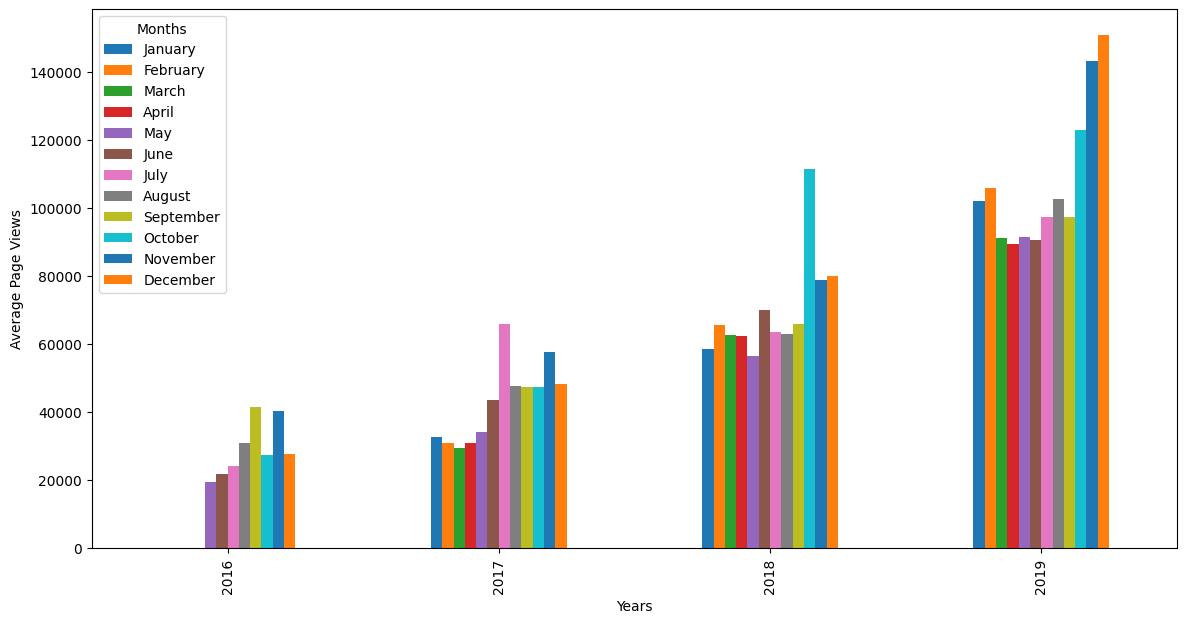

In [43]:
# Bar Plot

def draw_bar_plot():
    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.strftime('%B')
    df_bar = df_bar.groupby(['year', 'month'])['value'].mean().unstack()
    
    # Reorder the months
    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
              'August', 'September', 'October', 'November', 'December']
    df_bar = df_bar.reindex(columns=months)
    
    fig, ax = plt.subplots(figsize=(14, 7))
    df_bar.plot(kind='bar', ax=ax)
    
    ax.set_xlabel('Years')
    ax.set_ylabel('Average Page Views')
    ax.legend(title='Months')
    
    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')

draw_bar_plot()


5. Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.


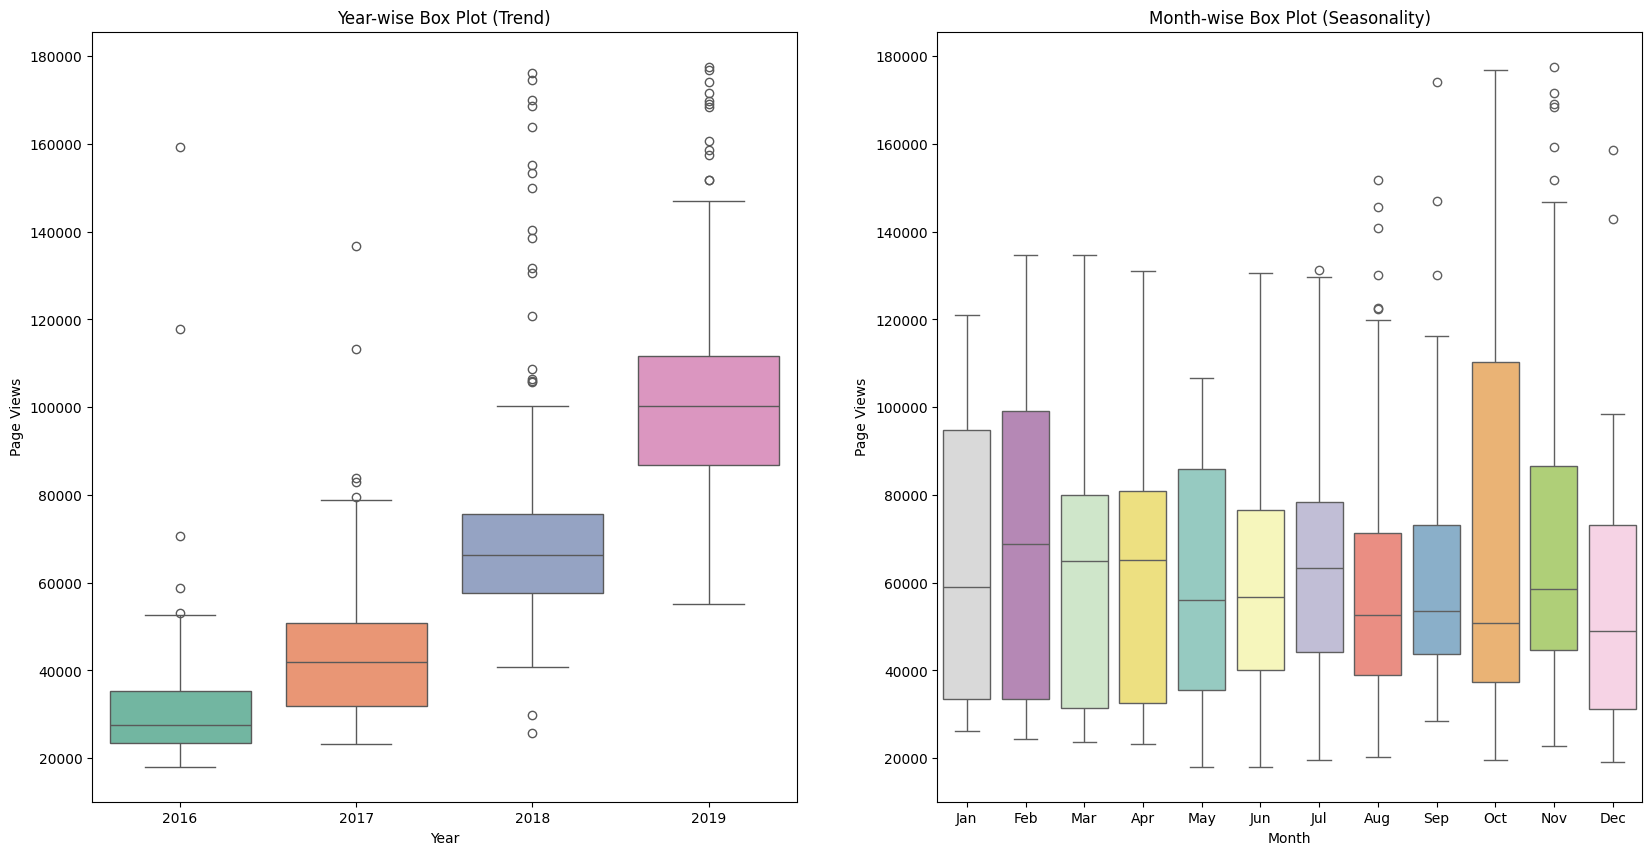

In [42]:
def draw_box_plot():
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
    
    sns.boxplot(x='year', y='value', data=df_box, ax=ax1, hue='year', palette='Set2', dodge=False, legend=False)
    ax1.set_title('Year-wise Box Plot (Trend)')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Page Views')
    
    month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    sns.boxplot(x='month', y='value', data=df_box, order=month_order, ax=ax2, hue='month', palette='Set3', dodge=False, legend=False)
    ax2.set_title('Month-wise Box Plot (Seasonality)')
    ax2.set_xlabel('Month')
    ax2.set_ylabel('Page Views')
    
    fig.savefig('box_plot.png')

draw_box_plot()